# Análise exploratória dos dados

# importando bibliotecas

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

#metricas de avaliação dos modelos
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## 1. Analise Exploratoria

### A. Lendo arquivo csv

In [ ]:
dados = pd.read_csv('./precos_carros_brasil.csv')

### B. Verificando os dados - após preenchimento de valores nulos


In [5]:
# B. Verificando os dados
dados.isna().any()

year_of_reference     True
month_of_reference    True
fipe_code             True
authentication        True
brand                 True
model                 True
fuel                  True
gear                  True
engine_size           True
year_model            True
avg_price_brl         True
dtype: bool

In [6]:
# B. Verificando os dados - após preenchimento de valores nulos
for col in dados:
    dados[col] = dados[col].fillna(dados[col].mode()[0])
    

In [ ]:
dados.isna().sum()

year_of_reference     0
month_of_reference    0
fipe_code             0
authentication        0
brand                 0
model                 0
fuel                  0
gear                  0
engine_size           0
year_model            0
avg_price_brl         0
dtype: int64

### D . Criando colunas novas - Numericas e Categoricas

In [ ]:

# dados['categorical_cols'] = dados.select_dtypes(include=['object']).columns.tolist()
numerical_cols = dados.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in numerical_cols:
    dados[col] = dados[col].astype(float)

dados.head()
# dados['numerical_cols'].describe()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021.0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002.0,9162.0
1,2021.0,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001.0,8832.0
2,2021.0,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000.0,8388.0
3,2021.0,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000.0,8453.0
4,2021.0,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001.0,12525.0


### E. Contagem de valores por model e marca

In [ ]:

dados['model'].value_counts()

model
Focus 1.6 S/SE/SE Plus Flex 8V/16V 5p     65670
Palio Week. Adv/Adv TRYON 1.8 mpi Flex      425
Focus 2.0 16V/SE/SE Plus Flex 5p Aut.       400
Saveiro 1.6 Mi/ 1.6 Mi Total Flex 8V        400
Corvette 5.7/ 6.0, 6.2 Targa/Stingray       375
                                          ...  
STEPWAY Zen Flex 1.0 12V Mec.                 2
Saveiro Robust 1.6 Total Flex 16V CD          2
Saveiro Robust 1.6 Total Flex 16V             2
Gol Last Edition 1.0 Flex 12V 5p              2
Polo Track 1.0 Flex 12V 5p                    2
Name: count, Length: 2112, dtype: int64

In [ ]:

dados['brand'].value_counts()

brand
Fiat               110207
VW - VolksWagen     44312
GM - Chevrolet      38590
Ford                33151
Renault             29192
Nissan              12090
Name: count, dtype: int64

### F.
Muitas informações sem dados, todas as colunas tinham valores faltantes. Focus é muito recorrente 145.5 vezes a mais que o Palio week em segundo lugar.

# 2 Visualização dos dados

### A. Distribuição da quantidade de carros por marca


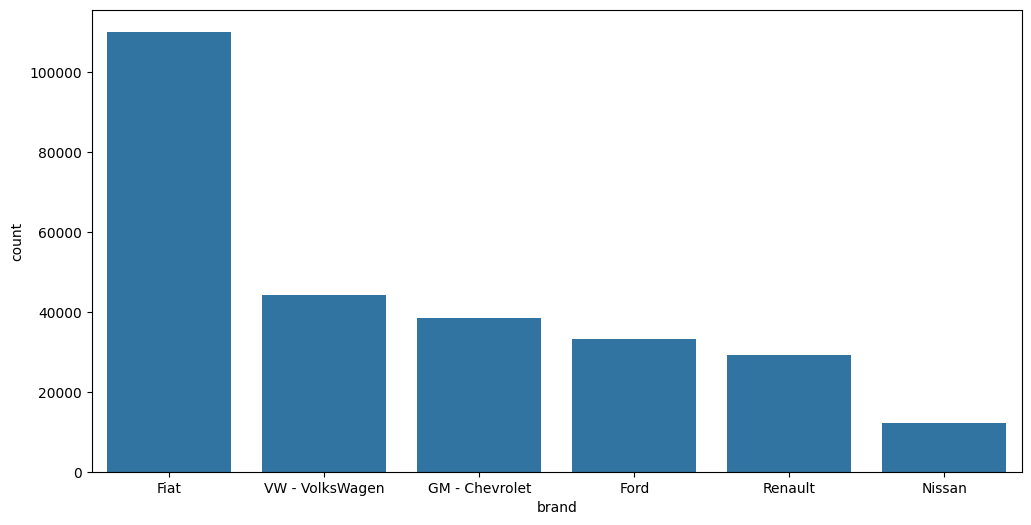

In [26]:

plt.figure(figsize=(12, 6))
grafico_1 = sns.countplot(data=dados, x='brand', order=dados['brand'].value_counts().index)

### B. Gere um grafico da distribuição da quantidade de carros por tiupo de engrenagem do carro


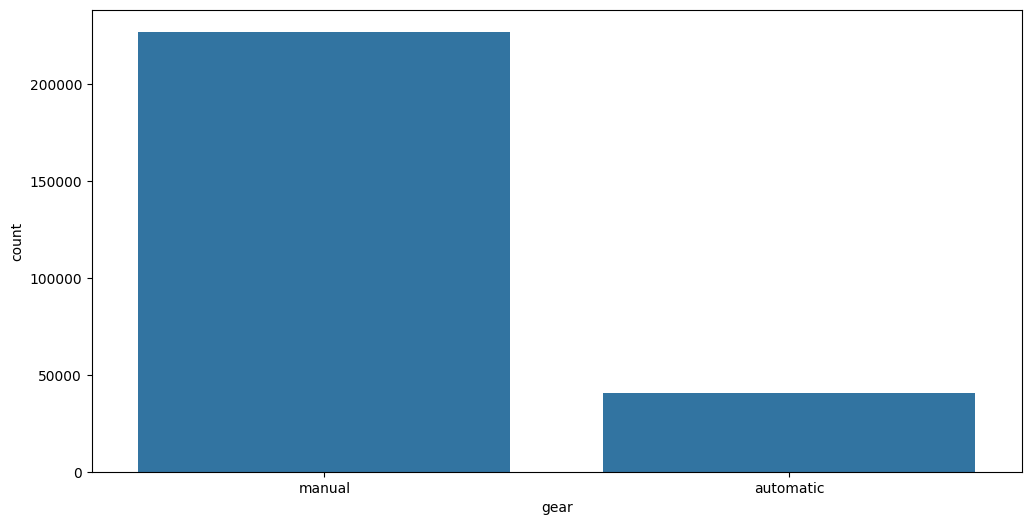

In [ ]:

plt.figure(figsize=(12, 6))
grafico_1 = sns.countplot(data=dados, x='gear', order=dados['gear'].value_counts().index)

### C. Gere um grafico da evolçução da média de proeço dos carros ao longo dos meses 2022

In [ ]:
# Criar uma coluna que filtra apenas os meses de 2022
dados['meses_2022'] = dados.loc[dados['year_of_reference'] == 2022, 'month_of_reference']

# Mostrar os meses de 2022

# Mostrar os meses de 2022

In [ ]:
media_preco_por_mes = dados.groupby(['brand', 'meses_2022'])['avg_price_brl'].mean()
media_preco_por_mes

brand            meses_2022
Fiat             April         46819.967724
                 August        46263.911781
                 December      47450.666667
                 February      46185.890547
                 January       69328.286933
                                   ...     
VW - VolksWagen  March         51693.743820
                 May           52604.347042
                 November      51943.606943
                 October       52486.452009
                 September     52467.655288
Name: avg_price_brl, Length: 72, dtype: float64

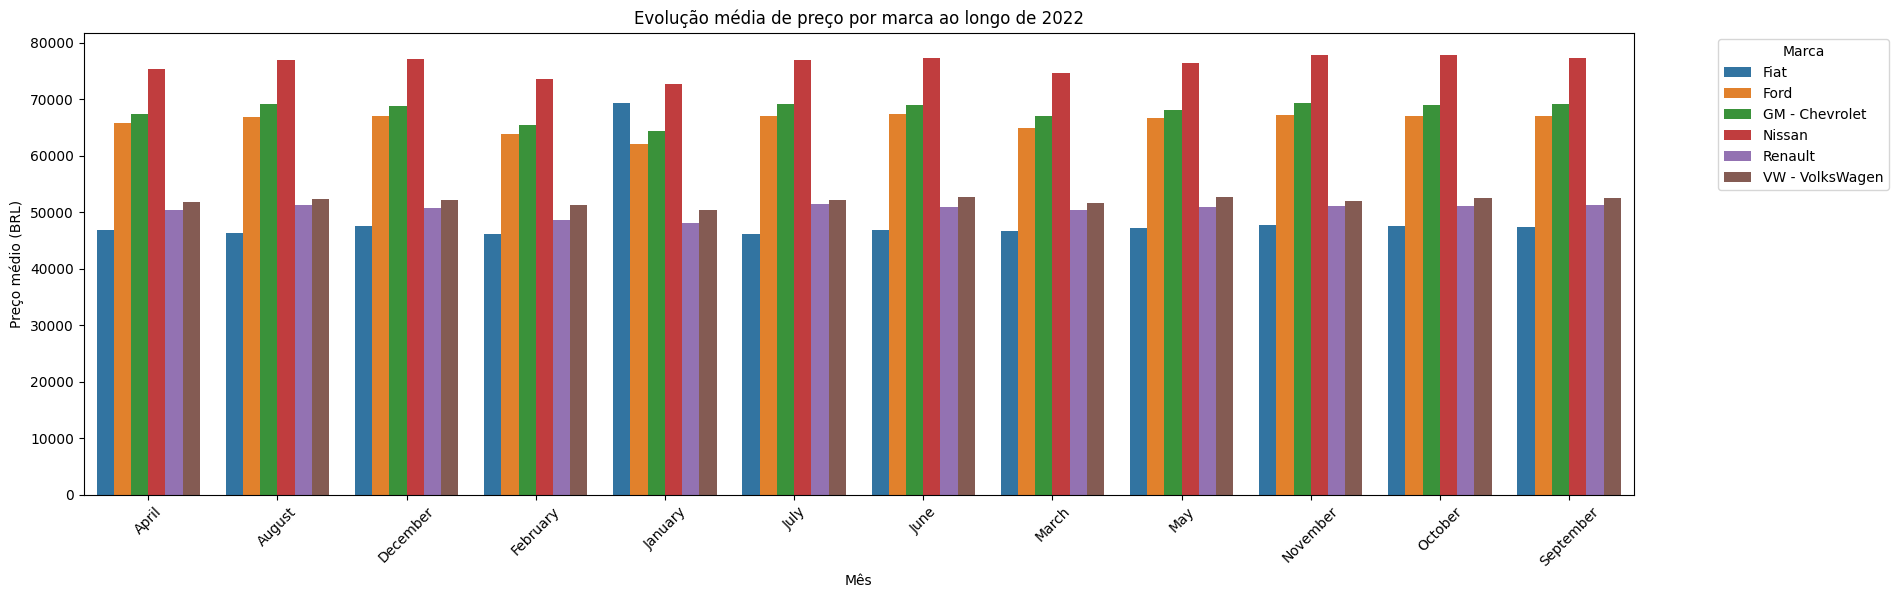

In [ ]:
# Convertendo a Series para DataFrame para uso adequado no barplot
media_preco_df = media_preco_por_mes.reset_index()

plt.figure(figsize=(20, 6))
sns.barplot(x='meses_2022', y='avg_price_brl', hue='brand', data=media_preco_df)
plt.title('Evolução média de preço por marca ao longo de 2022') # Inserção do título
plt.ylabel('Preço médio (BRL)') # Rótulo do eixo Y
plt.xlabel('Mês') # Rótulo do eixo X
plt.xticks(rotation=45) # Rotacionar os rótulos do eixo x para melhor legibilidade
plt.legend(title='Marca', bbox_to_anchor=(1.05, 1), loc='upper left')

### D. Grafico média de preço por marca e tipo de engrenagam



In [18]:
# Agrupamento por gênero e nível do cargo - Júnior, Pleno, Sênior e Gestão
# Cálculo da média por nível do cargo e gênero
media_marca_marcha = dados.groupby(['brand', 'gear'])['avg_price_brl'].mean()
media_marca_marcha = dados.reset_index()
media_marca_marcha.head()

,index,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,0,2021.0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002.0,9162.0
1,1,2021.0,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001.0,8832.0
2,2,2021.0,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000.0,8388.0
3,3,2021.0,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000.0,8453.0
4,4,2021.0,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001.0,12525.0


<Axes: xlabel='brand', ylabel='avg_price_brl'>

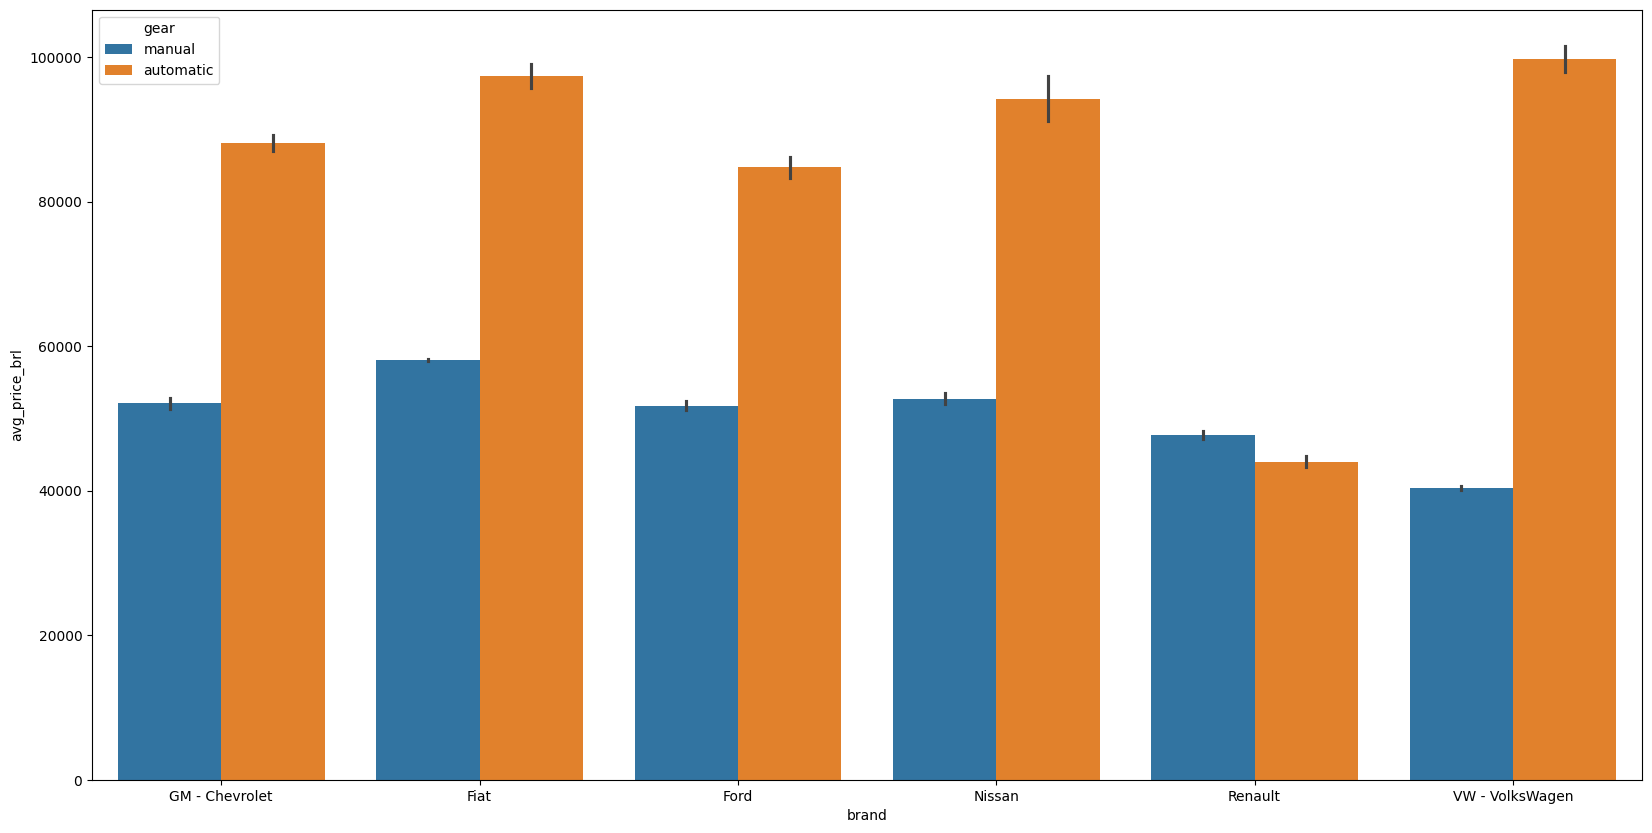

In [20]:
# Visualizando a média salarial por nível do cargo
plt.figure(figsize=(20,10))
sns.barplot(x='brand', y='avg_price_brl', hue='gear', data=media_marca_marcha)

### E -Dê uma breve explicação (máximo de quatro linhas) sobre os resultados gerados noitem D


 O gráfico mostra que, em geral, carros com câmbio automático possuem preços médios mais elevados do que os com câmbio manual para a maioria das marcas analisadas. 
 A Volkswagen apresenta a maior diferença de preço entre câmbios, com automáticos custando mais que o dobro dos manuais.
 A Renault é a exceção, onde carros manuais têm preço médio ligeiramente superior aos automáticos.
 Volkswagen e Fiat possuem os carros automáticos mais caros, enquanto VW tem os manuais mais baratos.

 ### f. Gere um grafico da distribuição da média de preço dos carros por marca e tipo de combustivel

In [24]:
# Agrupamento por gênero e nível do cargo - Júnior, Pleno, Sênior e Gestão
# Cálculo da média por nível do cargo e gênero
media_marca_fuel = dados.groupby(['brand', 'fuel'])['avg_price_brl'].mean()
media_marca_fuel = dados.reset_index()
media_marca_fuel.head()

,index,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,0,2021.0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002.0,9162.0
1,1,2021.0,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001.0,8832.0
2,2,2021.0,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000.0,8388.0
3,3,2021.0,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000.0,8453.0
4,4,2021.0,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001.0,12525.0


<Axes: xlabel='brand', ylabel='avg_price_brl'>

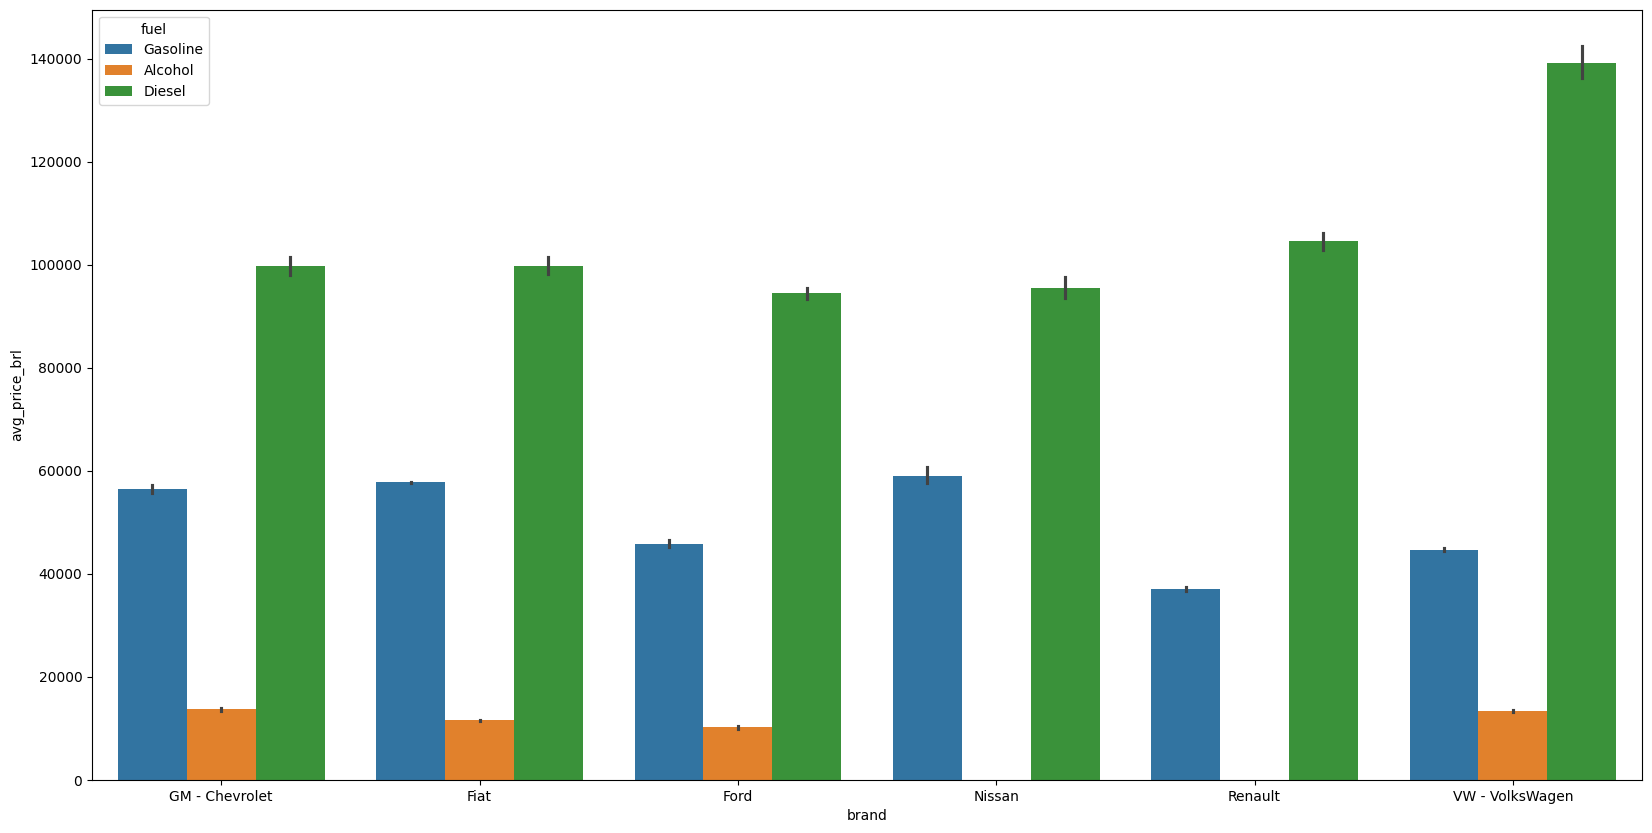

In [25]:
# Visualizando a média salarial por nível do cargo
plt.figure(figsize=(20,10))
sns.barplot(x='brand', y='avg_price_brl', hue='fuel', data=media_marca_fuel)

### 8. Dê uma breve explicação maxima 4 linhas sobre o resultado gerado a cima 

O gráfico revela que carros flex têm preços médios mais elevados em todas as marcas analisadas, provavelmente por serem modelos mais recentes. Os veículos a gasolina ocupam uma posição intermediária, enquanto os movidos a álcool apresentam os menores preços médios consistentemente. Entre as marcas, Volkswagen e Fiat oferecem os modelos flex mais caros, enquanto a Renault tem os preços médios mais baixos em todas as categorias de combustível.

# 3. Aplicação de modelos de machine learning para prever o preço medio dos carros

### A.
escolha as variáveis numéricas (modelos de Regressão) para serem as variáveis
independentes do modelo.A variável target é avg_price. Observação: caso julgue
necessário, faça a transformação de variáveis categóricas em variáveis numéricas para
inputar no mod

### B. 
Crie partições contendo 75% dos dados para treino e 25% para teste

### C.
Treine modelos RandomForest (biblioteca RandomForestRegressor) e XGBoost
(biblioteca XGBRegressor) para predição dos preços dos carros. Observação: caso
julgue necessário, mude os parâmetros dos modelos e rode novos modelos. Indique
quais parâmetros foram inputados e indique o treinamento de cada modelo

### D.
Grave os valores preditos em variáveis criadas

### E.
Realize a análise de importância das variáveis para estimar a variável target, para cada
modelo treinado


### F.
Dê uma breve explicação (máximo de quatro linhas) sobre os resultados encontrados
na análise de importância de variáveis

### G.
Escolha o melhor modelo com base nas métricas de avaliação MSE, MAE e R²

### H.
Dê uma breve explicação (máximo de quatro linhas) sobre qual modelo gerou o melhor
resultado e a métrica de avaliação utilizada